# High-level interface for users

<div class="alert alert-warning">
WARNING: if you're running this notebook on [try.cameo.bio](http://try.cameo.bio), things might run very slow due to our inability to provide access to the [CPLEX](https://www-01.ibm.com/software/commerce/optimization/cplex-optimizer/) solver on a public webserver. Furthermore, Jupyter kernels might crash and restart due to memory limitations on the server.
</div>

Users primarily interested in using cameo as a tool
for enumerating metabolic engineering strategies have access to cameo's advanced programming interface via `cameo.api`
that provides access to potential products (`cameo.api.products`), host organisms (`cameo.api.hosts`) and
a configurable design function (`cameo.api.design`). Running `cameo.api.design` requires only minimal input and will run the following workflow.
<img src="images/strain_design_workflow.png" alt="Drawing" style="width: 400px;" align="left"/>

Import the advanced interface.

In [1]:
from cameo import api

## Searching for products

Search by trivial name.

In [2]:
api.products.search('caffeine')

InChI  \
MNXM680  InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)...   

                               SMILES charge    formula      mass      name  \
MNXM680  CN1C=NC2=C1C(=O)N(C)C(=O)N2C      0  C8H10N4O2  194.1906  caffeine   

              source  search_rank  
MNXM680  chebi:27732            0

Search by ChEBI ID.

In [3]:
api.products.search('chebi:27732')

InChI  \
MNXM680  InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)...   

                               SMILES charge    formula      mass      name  \
MNXM680  CN1C=NC2=C1C(=O)N(C)C(=O)N2C      0  C8H10N4O2  194.1906  caffeine   

              source  search_rank  
MNXM680  chebi:27732            0

## Host organisms

Currently the following host organisms and respective models are available in cameo. More hosts and models will be added in the future (please get in touch with us if you'd like to get a particular host organism included).

In [4]:
for host in api.hosts:
    for model in host.models:
        print(host.name, model.id)

Escherichia coli iJO1366
Saccharomyces cerevisiae iMM904


## Computing strain engineering strategies

For demonstration purposes, we'll set a few options to limit the computational time. Also we'll create a multiprocessing view to take advantage of multicore CPUs (strain design algorithms will be run in parallel for individually predicted heterologous pathways).

In [5]:
from cameo.parallel import MultiprocessingView
mp_view = MultiprocessingView()

Limit the number of predicted heterlogous pathways to 4.

In [6]:
api.design.options.max_pathway_predictions = 4

Set a time limit of 30 minutes on individual heuristic optimizations.

In [7]:
api.design.options.heuristic_optimization_timeout = 30


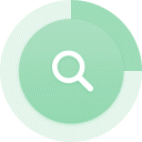

equation  lower_bound  \
MNXR5340   H(+) + NADH + O2 + vanillate <=> H2O + 3,4-dih...        -1000   
MNXR5336   2.0 H(+) + NADH + vanillate <=> H2O + vanillin...        -1000   
MNXR68718  H2O + 3,4-dihydroxybenzoate <=> 3-dehydroshiki...        -1000   
MNXR651    2.0 H(+) + NADH + formate <=> H2O + formaldehy...        -1000   

           upper_bound  
MNXR5340          1000  
MNXR5336          1000  
MNXR68718         1000  
MNXR651           1000

Max flux: 7.58479


equation  lower_bound  \
MNXR5340   H(+) + NADH + O2 + vanillate <=> H2O + 3,4-dih...        -1000   
MNXR5336   2.0 H(+) + NADH + vanillate <=> H2O + vanillin...        -1000   
MNXR2795   S-adenosyl-L-methionine + glycine <=> H(+) + S...        -1000   
MNXR68718  H2O + 3,4-dihydroxybenzoate <=> 3-dehydroshiki...        -1000   

           upper_bound  
MNXR5340          1000  
MNXR5336          1000  
MNXR2795          1000  
MNXR68718         1000

Max flux: 4.29196


equation  lower_bound  \
MNXR5340   H(+) + NADH + O2 + vanillate <=> H2O + 3,4-dih...        -1000   
MNXR5336   2.0 H(+) + NADH + vanillate <=> H2O + vanillin...        -1000   
MNXR68718  H2O + 3,4-dihydroxybenzoate <=> 3-dehydroshiki...        -1000   
MNXR7147   3-methyl-2-oxobutanoate + formaldehyde <=> 2-d...        -1000   

           upper_bound  
MNXR5340          1000  
MNXR5336          1000  
MNXR68718         1000  
MNXR7147          1000

Max flux: 7.33229


equation  lower_bound  \
MNXR5340  H(+) + NADH + O2 + vanillate <=> H2O + 3,4-dih...        -1000   
MNXR5336  2.0 H(+) + NADH + vanillate <=> H2O + vanillin...        -1000   
MNXR230   H(+) + 4-hydroxybenzoate + O2 + NADPH <=> H2O ...        -1000   
MNXR640    methanol + NAD(+) <=> H(+) + NADH + formaldehyde        -1000   

          upper_bound  
MNXR5340         1000  
MNXR5336         1000  
MNXR230          1000  
MNXR640          1000

<IPython.core.display.Javascript object>


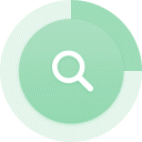

equation  lower_bound  \
MNXR5340  H(+) + NADH + O2 + vanillate <=> H2O + 3,4-dih...        -1000   
MNXR5336  2.0 H(+) + NADH + vanillate <=> H2O + vanillin...        -1000   
MNXR230   H(+) + 4-hydroxybenzoate + O2 + NADPH <=> H2O ...        -1000   

          upper_bound  
MNXR5340         1000  
MNXR5336         1000  
MNXR230          1000

Max flux: 1.90533


equation  lower_bound  \
MNXR5340   H(+) + NADH + O2 + vanillate <=> H2O + 3,4-dih...        -1000   
MNXR5336   2.0 H(+) + NADH + vanillate <=> H2O + vanillin...        -1000   
MNXR68718  H2O + 3,4-dihydroxybenzoate <=> 3-dehydroshiki...        -1000   

           upper_bound  
MNXR5340          1000  
MNXR5336          1000  
MNXR68718         1000

Max flux: 3.36842


equation  lower_bound  \
MNXR4008  H(+) + 3-oxoadipate <=> H2O + 5-oxo-4,5-dihydr...        -1000   
MNXR184   3-oxoadipyl-CoA + succinate <=> 3-oxoadipate +...        -1000   
MNXR5340  H(+) + NADH + O2 + vanillate <=> H2O + 3,4-dih...        -1000   
MNXR5336  2.0 H(+) + NADH + vanillate <=> H2O + vanillin...        -1000   
MNXR228   CO2 + 5-oxo-4,5-dihydro-2-furylacetate <=> H(+...        -1000   
MNXR4119  2.0 H(+) + 3-carboxy-cis,cis-muconate <=> 3,4-...        -1000   
MNXR209   CoA + 3-oxoadipyl-CoA <=> acetyl-CoA + succiny...        -1000   
MNXR3655  2-(carboxymethyl)-5-oxo-2,5-dihydro-2-furoate ...        -1000   

          upper_bound  
MNXR4008         1000  
MNXR184          1000  
MNXR5340         1000  
MNXR5336         1000  
MNXR228          1000  
MNXR4119         1000  
MNXR209          1000  
MNXR3655         1000

Max flux: 5.59223


<IPython.core.display.Javascript object>

Optimizing 6 pathways
Starting optimization at Wed, 07 Jun 2017 08:50:22
Starting optimization at Wed, 07 Jun 2017 08:51:06
Starting optimization at Wed, 07 Jun 2017 08:51:07
Starting optimization at Wed, 07 Jun 2017 08:51:10


Finished after 00:30:13
Finished after 00:30:05
Starting optimization at Wed, 07 Jun 2017 09:21:19
Starting optimization at Wed, 07 Jun 2017 09:22:00
Finished after 00:31:49
Finished after 00:32:06


Finished after 00:18:19
Finished after 00:30:43


/Users/niso/Dev/cameo/cameo/strain_design/heuristic/evolutionary/objective_functions.py:289: RuntimeWarning:

invalid value encountered in double_scalars



In [8]:
report = api.design(product='vanillin', view=mp_view)

In [9]:
report

host    model  \
0   Saccharomyces cerevisiae   iMM904   
1   Saccharomyces cerevisiae   iMM904   
2   Saccharomyces cerevisiae   iMM904   
3   Saccharomyces cerevisiae   iMM904   
4   Saccharomyces cerevisiae   iMM904   
5   Saccharomyces cerevisiae   iMM904   
6   Saccharomyces cerevisiae   iMM904   
7           Escherichia coli  iJO1366   
8           Escherichia coli  iJO1366   
9           Escherichia coli  iJO1366   
10          Escherichia coli  iJO1366   
11          Escherichia coli  iJO1366   
12          Escherichia coli  iJO1366   
13          Escherichia coli  iJO1366   
14          Escherichia coli  iJO1366   
15          Escherichia coli  iJO1366   
16          Escherichia coli  iJO1366   
17          Escherichia coli  iJO1366   
18          Escherichia coli  iJO1366   
19          Escherichia coli  iJO1366   
20          Escherichia coli  iJO1366   
21          Escherichia coli  iJO1366   
22          Escherichia coli  iJO1366   
23          Escherichia coli  iJO1366   
24          Escherichia coli  iJO1366   
25          Escherichia coli  iJO1366   
26          Escherichia coli  iJO1366   
27          Escherichia coli  iJO1366   
28          Escherichia coli  iJO1366   
29          Escherichia coli  iJO1366   
..                       ...      ...   
32          Escherichia coli  iJO1366   
33          Escherichia coli  iJO1366   
34  Saccharomyces cerevisiae   iMM904   
35  Saccharomyces cerevisiae   iMM904   
36  Saccharomyces cerevisiae   iMM904   
37  Saccharomyces cerevisiae   iMM904   
38  Saccharomyces cerevisiae   iMM904   
39  Saccharomyces cerevisiae   iMM904   
40  Saccharomyces cerevisiae   iMM904   
41  Saccharomyces cerevisiae   iMM904   
42  Saccharomyces cerevisiae   iMM904   
43  Saccharomyces cerevisiae   iMM904   
44  Saccharomyces cerevisiae   iMM904   
45  Saccharomyces cerevisiae   iMM904   
46  Saccharomyces cerevisiae   iMM904   
47  Saccharomyces cerevisiae   iMM904   
48  Saccharomyces cerevisiae   iMM904   
49  Saccharomyces cerevisiae   iMM904   
50  Saccharomyces cerevisiae   iMM904   
51  Saccharomyces cerevisiae   iMM904   
52  Saccharomyces cerevisiae   iMM904   
53  Saccharomyces cerevisiae   iMM904   
54  Saccharomyces cerevisiae   iMM904   
55  Saccharomyces cerevisiae   iMM904   
56  Saccharomyces cerevisiae   iMM904   
57  Saccharomyces cerevisiae   iMM904   
58  Saccharomyces cerevisiae   iMM904   
59  Saccharomyces cerevisiae   iMM904   
60  Saccharomyces cerevisiae   iMM904   
61  Saccharomyces cerevisiae   iMM904   

                                        manipulations  \
0            (-YOR347C, -YAL038W, -YJL121C, -YPL061W)   
1            (-YOR347C, -YAL038W, -YJL121C, -YDL022W)   
2            (-YOR347C, -YAL038W, -YJL121C, -YNL111C)   
3   (-YOR347C, -YAL038W, -YGR010W, -YJL026W, -YFR0...   
4   (-YDL021W, -YOR347C, -YAL038W, -YNR001C, -YFR0...   
5                      (-YOR347C, -YAL038W, -YJL121C)   
6            (-YOR347C, -YAL038W, -YJL121C, -YIR032C)   
7   (-reaction.3OAR140, -reaction.3OAS140, -reacti...   
8   (+reaction.3OAR140(value=0.008511), +reaction....   
9   (+reaction.3OAR140(value=0.01699), +reaction.3...   
10  (+reaction.3OAR140(value=0.025485), +reaction....   
11  (+reaction.3OAR140(value=0.033979), +reaction....   
12  (+reaction.3OAR140(value=0.042474), +reaction....   
13  (+reaction.3OAR140(value=0.050969), +reaction....   
14                                                 ()   
15                                                 ()   
16  (-reaction.3OAR140, -reaction.3OAS140, -reacti...   
17  (+reaction.3OAR140(value=0.008512), +reaction....   
18  (+reaction.3OAR140(value=0.017023), +reaction....   
19  (+reaction.3OAR140(value=0.025534), +reaction....   
20  (+reaction.3OAR140(value=0.034045), +reaction....   
21  (+reaction.3OAR140(value=0.042474), +reaction....   
22  (+reaction.3OAR140(value=0.050969), +reaction....   
23                                                 ()   
24                                                 ()   

### IPython notebook

Click [here](http://nbviewer.ipython.org/github/biosustain/cameo/blob/devel/docs/cameo_high_level_interface.ipynb) to download this page as an IPython notebook.